<a href="https://colab.research.google.com/github/DanielaM8/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
filename = ('/content/gdrive/My Drive/Colab Notebooks/NGC0528.V500.rscube.fits.gz') #basta con el nombre
hdu_fits = fits.open(filename) 
hdu = fits.open(filename)[0] 
header = hdu.header
wcs = WCS(header) 
print wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 21.38971934413089  33.67149031224319  3749.0  
CRPIX : 31.0  31.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 78  72  1877


In [4]:
#Carga de datos
data=hdu.data
print data

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

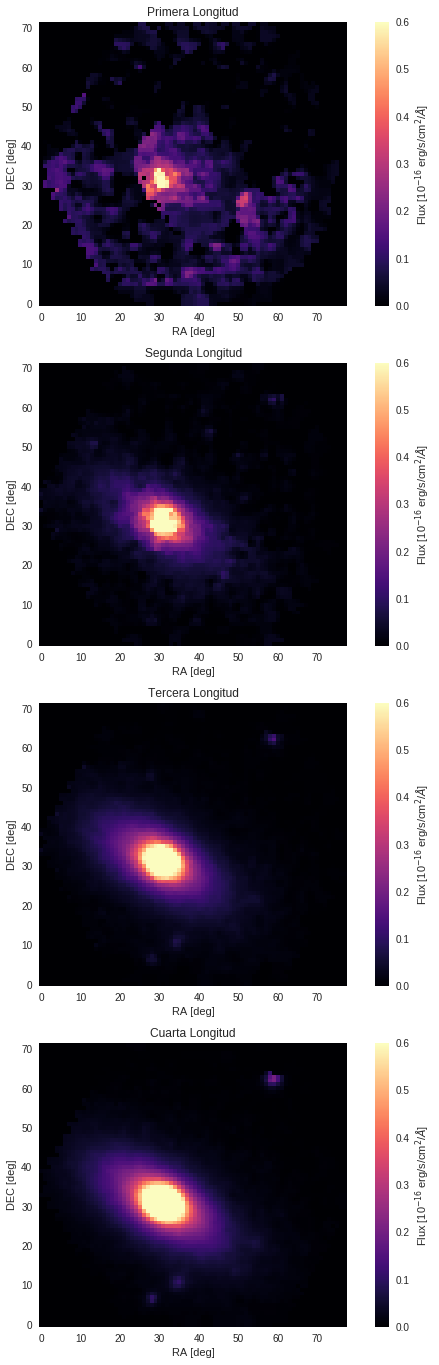

In [5]:
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np

fig, ax= plt.subplots(figsize=(10,24),nrows=4)

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

units = header['HIERARCH PIPE UNITS']

#Primer Gráfico:

cb1= ax[0].imshow(data[0],vmax=0.6,vmin=0,cmap='magma',origin='lower')
fig.colorbar(cb1,ax=ax[0],label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[0].set_xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3)))
ax[0].set_yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3)))
ax[0].set_xlabel('RA [deg]')
ax[0].set_ylabel('DEC [deg]')
ax[0].set_title('Primera Longitud')
ax[0].grid(b=None)

#Segundo Gráfico:

cb2= ax[1].imshow(data[230],vmax=0.6,vmin=0,cmap='magma',origin='lower')
fig.colorbar(cb2,ax=ax[1],label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[1].set_xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3)))
ax[1].set_yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3)))
ax[1].set_xlabel('RA [deg]')
ax[1].set_ylabel('DEC [deg]')
ax[1].set_title('Segunda Longitud')
ax[1].grid(b=None)

#Tercer Gráfico:

cb3= ax[2].imshow(data[760],vmax=0.6,vmin=0,cmap='magma',origin='lower')
fig.colorbar(cb3,ax=ax[2],label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[2].set_xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3)))
ax[2].set_yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3)))
ax[2].set_xlabel('RA [deg]')
ax[2].set_ylabel('DEC [deg]')
ax[2].set_title('Tercera Longitud')
ax[2].grid(b=None)

#Cuarto Gráfico:

cb4= ax[3].imshow(data[1480],vmax=0.6,vmin=0,cmap='magma',origin='lower')
fig.colorbar(cb4,ax=ax[3],label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[3].set_xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3)))
ax[3].set_yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3)))
ax[3].set_xlabel('RA [deg]')
ax[3].set_ylabel('DEC [deg]')
ax[3].set_title('Cuarta Longitud')
ax[3].grid(b=None)

#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

Text(0.5,1,'Pixel (57,10))')

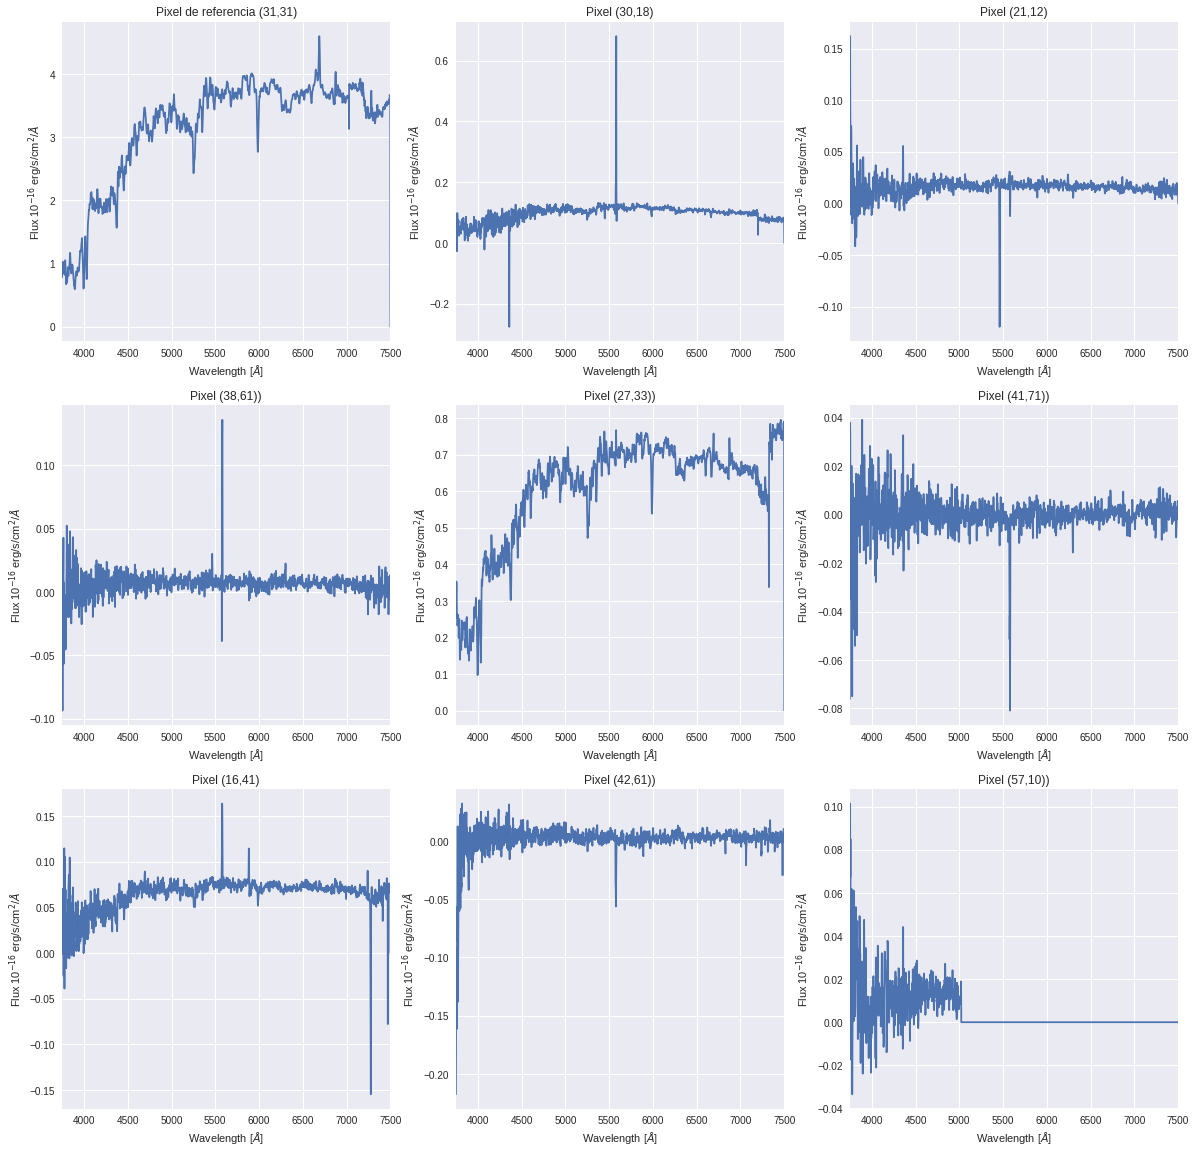

In [6]:


fig2, axs=plt.subplots(figsize=(20,20),ncols=3,nrows=3)

#Valor de referencia del Header:

axs[0,0].plot(lo,data[:,31,31])
axs[0,0].set_xlim(3750,7500)
axs[0,0].set_xlabel('Wavelength [$\AA$]')
axs[0,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[0,0].set_title('Pixel de referencia (31,31)')

#Valores escogidos al azar

axs[0,1].plot(lo,data[:,30,18])
axs[0,1].set_xlim(3750,7500)
axs[0,1].set_xlabel('Wavelength [$\AA$]')
axs[0,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[0,1].set_title('Pixel (30,18)')

axs[0,2].plot(lo,data[:,21,12])
axs[0,2].set_xlim(3750,7500)
axs[0,2].set_xlabel('Wavelength [$\AA$]')
axs[0,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[0,2].set_title('Pixel (21,12)')

axs[1,0].plot(lo,data[:,38,61])
axs[1,0].set_xlim(3750,7500)
axs[1,0].set_xlabel('Wavelength [$\AA$]')
axs[1,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[1,0].set_title('Pixel (38,61))')

axs[1,1].plot(lo,data[:,27,33])
axs[1,1].set_xlim(3750,7500)
axs[1,1].set_xlabel('Wavelength [$\AA$]')
axs[1,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[1,1].set_title('Pixel (27,33))')

axs[1,2].plot(lo,data[:,41,71])
axs[1,2].set_xlim(3750,7500)
axs[1,2].set_xlabel('Wavelength [$\AA$]')
axs[1,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[1,2].set_title('Pixel (41,71))')

axs[2,0].plot(lo,data[:,16,41])
axs[2,0].set_xlim(3750,7500)
axs[2,0].set_xlabel('Wavelength [$\AA$]')
axs[2,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[2,0].set_title('Pixel (16,41)')
                   
axs[2,1].plot(lo,data[:,42,61])
axs[2,1].set_xlim(3750,7500)
axs[2,1].set_xlabel('Wavelength [$\AA$]')
axs[2,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[2,1].set_title('Pixel (42,61))')

axs[2,2].plot(lo,data[:,57,10])
axs[2,2].set_xlim(3750,7500)
axs[2,2].set_xlabel('Wavelength [$\AA$]')
axs[2,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
axs[2,2].set_title('Pixel (57,10))')

In [0]:
#Cálculo del Redshift


#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [7]:
from astropy.coordinates import SkyCoord

#RUT: 20.213.048-8

pos = SkyCoord(ra=48*u.degree, dec=48*u.degree, frame='icrs')
print (pos)

<SkyCoord (ICRS): (ra, dec) in deg
    (48., 48.)>


#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [8]:
!pip install astroquery 
from astroquery.sdss import SDSS
xid = SDSS.query_region(pos, radius = 18010*u.arcsec, spectro=True)
#Me costó mucho encontrar en un radio para ese ángulo, no funcionaba ni 18000
print(xid)


    100% |████████████████████████████████| 4.2MB 3.9MB/s 
    100% |████████████████████████████████| 2.3MB 11.0MB/s 
    100% |████████████████████████████████| 102kB 27.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
  Stored in directory: /root/.cache/pip/wheels/4e/5b/1b/be8c8a830a0243af85b2946a0aece2c6743d7f7f946977ed67
Successfully built astroquery secretstorage


/usr/local/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


       ra              dec               objid        ... run2d instrument
---------------- ---------------- ------------------- ... ----- ----------
50.0172752679776 42.9990733734149 1237661061184618950 ...    26       SDSS


/usr/local/lib/python2.7/dist-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [9]:
#Gráfico
sp = SDSS.get_spectra(matches=xid)

#fotometría banda z
imz = SDSS.get_images(matches=xid, band='z')

#fotometría banda i
imi = SDSS.get_images(matches=xid, band='i')

#El radio es muy grande, por eso descarga muchos datos:

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 50.0552102879  43.0135485918  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 6.17597800477e-05  9.1013827942e-05  
CD2_1 CD2_2  : 9.11265935033e-05  -6.17441442589e-05  
NAXIS : 2048  1489
Valor 1 en el pixel de referencia =  50.0552102879
Valor 2 en el pixel de referencia =  43.0135485918
Pixel de referencia para variable 1 =  1025.0
Pixel de referencia para variable 2 =  745.0
Step para variable 1 =  6.17597800477e-05
Step para variable 2 =  -6.17441442589e-05


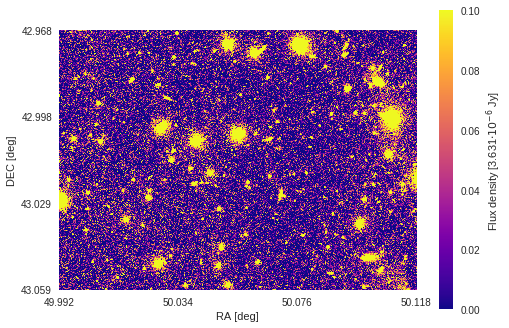

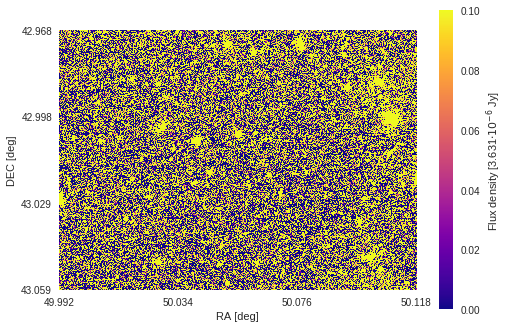

In [26]:
#Imprimir header de la fotometría de la banda i
header = imi[0][0].header
wcs = WCS(header) 
print wcs

print 'Valor 1 en el pixel de referencia = ',header['CRVAL1'] 
print 'Valor 2 en el pixel de referencia = ',header['CRVAL2'] 

print 'Pixel de referencia para variable 1 = ', header['CRPIX1'] 
print 'Pixel de referencia para variable 2 = ', header['CRPIX2'] 

print 'Step para variable 1 = ', header['CD1_1'] 
print 'Step para variable 2 = ', header['CD2_2'] 

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

datai = imi[0][0].data
dataz = imz[0][0].data



#imagen banda i

plt.imshow(datai,vmax=0.1,vmin=0,cmap='plasma',origin='lower')
plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[len(ra)/3],3),round(ra[2*len(ra)/3],3),round(ra[-1],3)))
plt.yticks((0,len(dec)/3,2*len(dec)/3,len(dec)),(round(dec[0],3),round(dec[len(dec)/3],3),round(dec[2*len(dec)/3],3),round(dec[-1],3))) 
plt.ylabel('DEC [deg]')
cb11=plt.colorbar()
plt.grid(b=None)
cb11.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda z

plt.imshow(dataz,vmax=0.1,vmin=0,cmap='plasma',origin='lower')
plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[len(ra)/3],3),round(ra[2*len(ra)/3],3),round(ra[-1],3))) 
plt.yticks((0,len(dec)/3,2*len(dec)/3,len(dec)),(round(dec[0],3),round(dec[len(dec)/3],3),round(dec[2*len(dec)/3],3),round(dec[-1],3)))
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None)
cb22=plt.colorbar()
cb22.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()


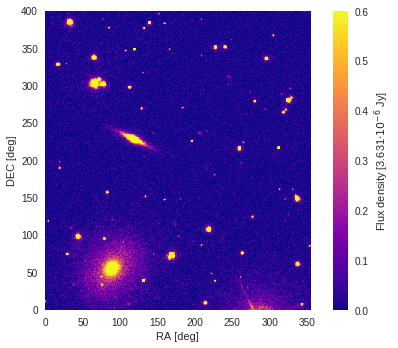

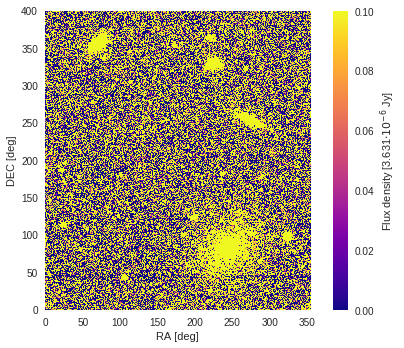

In [68]:

#Zoom:
#imagen banda i

plt.imshow(datai[872:1272,500:855],vmax=0.6,vmin=0,cmap='plasma',origin='lower')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.ylabel('DEC [deg]')
cb11=plt.colorbar()
plt.grid(b=None)
cb11.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda z

plt.imshow(dataz[850:1250,345:700],vmax=0.1,vmin=0,cmap='plasma',origin='lower')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None)
cb22=plt.colorbar()
cb22.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.

In [13]:
print repr(sp[0][0].header)
print WCS(sp[0][0].header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4578318320.43 / 1st row - Number of seconds since Nov 17 1858  
RA      =            49.960328 / 1st row - Right ascension of telescope boresigh
DEC     =            41.529854 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '07:44:09.52'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                52991 / MJD of observation                             
MJDLIST = '52988 52989 52991

Text(0,0.5,'Flux density [10$^{-17}$ erg/cm$^2$/s/$\\AA$]')

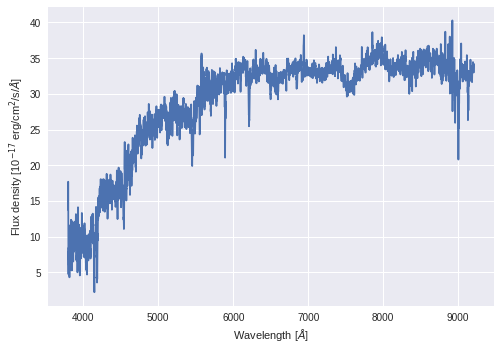

In [12]:
#Espectrometría 
fits = sp[0]
scidata = fits[1].data
flux = scidata['flux']
lam = scidata['loglam']
plt.plot(10**(lam), flux)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux density [10$^{-17}$ erg/cm$^2$/s/$\AA$]')